# Homework 3

Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [9]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')


## Task 1

Run the code below before you start working on your homework:


In [2]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [3]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [4]:
task2_data = pd.read_csv('../data/hw3-task2-data.csv')# <- YOUR CODE GOES HERE
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:1],task2_data.iloc[:,2],test_size=0.25)# <- YOUR CODE GOES HERE

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [6]:
model = KMeans(n_clusters=2, random_state = 1) # <- YOUR CODE GOES HERE
model.fit(Xtest) # <- YOUR CODE SHOULD REPLACE ?????
predictions =  model.predict(Xtest)# <- YOUR CODE GOES HERE

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [10]:
cm = confusion_matrix(Ytest,predictions) # <- YOUR CONFUSION MATRIX CODE GOES HERE
accuracy = accuracy_score(Ytest,predictions)# <- YOUR ACCURACY CODE GOES HERE
accuracy

0.48319327731092437

As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

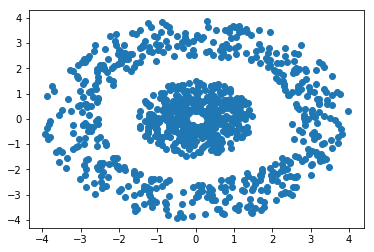

In [11]:
## Do your inspections and plots in this cell
plt.scatter(task2_data.x,task2_data.y)





In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below

k-means algorithm would not make a good model for this dataset, especially 2 clusters, because data points can't be partitioned to two different clusters, algorithm will not converge.


## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [12]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(Xtrain, Ytrain) # <- YOUR CODE SHOULD REPLACE ?????
predictions =  model.predict(Xtest)# <- YOUR CODE GOES HERE

Now, construct the confusion matrix, and calculate your accuracy.

In [13]:
cm = confusion_matrix(Ytest,predictions) # <- YOUR CONFUSION MATRIX CODE GOES HERE
accuracy = accuracy_score(Ytest, predictions)# <- YOUR ACCURACY CODE GOES HERE
accuracy

0.81512605042016806

Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below

This is a better model for this dataset because the data points can find their label better. For example, outer circle's data points won't choose neighbor as the inner circle's data points for the most part of the data points.


## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [14]:
data = pd.read_excel('../data/BreastTissue.xlsx')# your code goes here
data.head(10)
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [15]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.iloc[:,1:9], data.iloc[:,0], test_size=0.33)

In [16]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(Xtrain, Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[4 0 0 0 0 0]
 [0 6 0 0 0 0]
 [2 1 1 0 0 0]
 [0 1 0 2 1 1]
 [0 1 0 1 4 2]
 [0 3 0 1 1 3]]
0.571428571429


Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [17]:
scaler = StandardScaler()
scaler.fit(xs)
xs = scaler.transform(xs) # your code goes here

Now, repeat mdoel construction, training, testing and accuracy calculation

In [18]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(xs,ys)
predicted = model.predict(xs)
cm = confusion_matrix(ys,predicted)
accuracy = accuracy_score(ys,predicted)
print(cm)
print(accuracy)

[[22  0  0  0  0  0]
 [ 0 20  0  0  0  1]
 [ 1  0 13  0  0  0]
 [ 0  2  0 12  0  1]
 [ 0  1  0  0 13  2]
 [ 0  3  0  6  0  9]]
0.839622641509


Why did we get better results? Explain below:

### Your explanation goes below

We are doing feature scaling so wrong effects to the result coming from the differences of units goes away a little bit, so we get a better result.

## Task 5

Now, construct a k-nn model for the same dataset [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.

In [19]:
data = pd.read_excel('../data/BreastTissue.xlsx')
data.head(10)
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25)

model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(xs,ys)
predicted = model.predict(xs)
cm = confusion_matrix(ys,predicted)
accuracy = accuracy_score(ys,predicted)
print(cm)
print(accuracy)

[[21  0  1  0  0  0]
 [ 0 21  0  0  0  0]
 [ 1  2 11  0  0  0]
 [ 0  1  0 12  1  1]
 [ 0  1  0  3 10  2]
 [ 0  4  0  4  2  8]]
0.783018867925


In [20]:
scaler = StandardScaler()
scaler.fit(xs)
xs = scaler.transform(xs)
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(xs,ys)
predicted = model.predict(xs)
cm = confusion_matrix(ys,predicted)
accuracy = accuracy_score(ys,predicted)
print(cm)
print(accuracy)

[[22  0  0  0  0  0]
 [ 0 20  0  0  0  1]
 [ 1  0 13  0  0  0]
 [ 0  2  0 12  0  1]
 [ 0  1  0  0 13  2]
 [ 0  3  0  6  0  9]]
0.839622641509


Accuracy of feature scaled data is better.